In [1]:
#Load libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

In [4]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

In [5]:
# b) Load dataset
startTimeScript = datetime.now()

In [6]:
entireDataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\DS\\3. Projects\\Main Projects\\APS failure at Scania trucks-ML\\aps_failure_training_set - Copy.csv", na_values="na")

In [7]:
testDataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\DS\\3. Projects\\Main Projects\\APS failure at Scania trucks-ML\\aps_failure_test_set - Copy.csv", na_values="na")

In [8]:
# First we need to convert the class column from string to binary values
entireDataset['targetVar'] = 1
entireDataset['targetVar'] = np.where(entireDataset['class']=='neg', 0, entireDataset['targetVar'])
entireDataset.drop('class', axis=1, inplace=True)

In [9]:
testDataset['targetVar'] = 1
testDataset['targetVar'] = np.where(testDataset['class']=='neg', 0, testDataset['targetVar'])
testDataset.drop('class', axis=1, inplace=True)

In [10]:
# Standardize the class column to the name of targetVar
entireDataset = entireDataset.rename(columns={'class':'targetVar'})
testDataset = testDataset.rename(columns={'class':'targetVar'})

In [11]:
# 2. Summarize Data
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

In [12]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0:
    dispRow = totAttr // dispCol
else:
    dispRow = (totAttr //dispCol)+ 1

In [13]:
# a) Descriptive statistics
# 2.a.i) Peek at the data itself
print(entireDataset.head(20))

    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0    76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1    33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
2    41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3       12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4    60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
5    38312     NaN  2.130706e+09   218.0     0.0     0.0     0.0     0.0   
6       14     0.0  6.000000e+00     NaN     0.0     0.0     0.0     0.0   
7   102960     NaN  2.130706e+09   116.0     0.0     0.0     0.0     0.0   
8    78696     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0   
9   153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0     0.0   
10   39196     NaN  2.040000e+02   170.0     0.0     0.0     0.0     0.0   
11   45912     NaN  0.000000e+00   454.0     0.0     0.0     0.0     0.0   
12    2104  

In [14]:
# 2.a.ii) Dimensions of the dataset
print("Number of Rows and Columns in Train Data:", entireDataset.shape)
print("Number of Rows and Columns in Test Data:", testDataset.shape)

Number of Rows and Columns in Train Data: (60000, 21)
Number of Rows and Columns in Test Data: (16000, 21)


In [15]:
# 2.a.iii) Types of the attributes
print(entireDataset.dtypes)

aa_000         int64
ab_000       float64
ac_000       float64
ad_000       float64
ae_000       float64
af_000       float64
ag_000       float64
ag_001       float64
ag_002       float64
ag_003       float64
ag_004       float64
ag_005       float64
ag_006       float64
ag_007       float64
ag_008       float64
ag_009       float64
ah_000       float64
ai_000       float64
aj_000       float64
ak_000       float64
targetVar      int64
dtype: object


In [16]:
# 2.a.iv) Statistical summary of all attributes
Statistical_summary = entireDataset.describe()

In [17]:
# 2.a.v) Summarize the levels of the class attribute
print(entireDataset.groupby('targetVar').size())

targetVar
0    59000
1     1000
dtype: int64


In [18]:
# 2.a.vi) Count missing values
print(entireDataset.isnull().sum())
print(testDataset.isnull().sum())

aa_000           0
ab_000       46329
ac_000        3335
ad_000       14861
ae_000        2500
af_000        2500
ag_000         671
ag_001         671
ag_002         671
ag_003         671
ag_004         671
ag_005         671
ag_006         671
ag_007         671
ag_008         671
ag_009         671
ah_000         645
ai_000         629
aj_000         629
ak_000        4400
targetVar        0
dtype: int64
aa_000           0
ab_000       12363
ac_000         926
ad_000        3981
ae_000         690
af_000         690
ag_000         189
ag_001         189
ag_002         189
ag_003         189
ag_004         189
ag_005         189
ag_006         189
ag_007         189
ag_008         189
ag_009         189
ah_000         175
ai_000         163
aj_000         163
ak_000        1198
targetVar        0
dtype: int64


In [19]:
# b) Data visualizations
# Set figure width to 5 and height to 5 (5:5 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

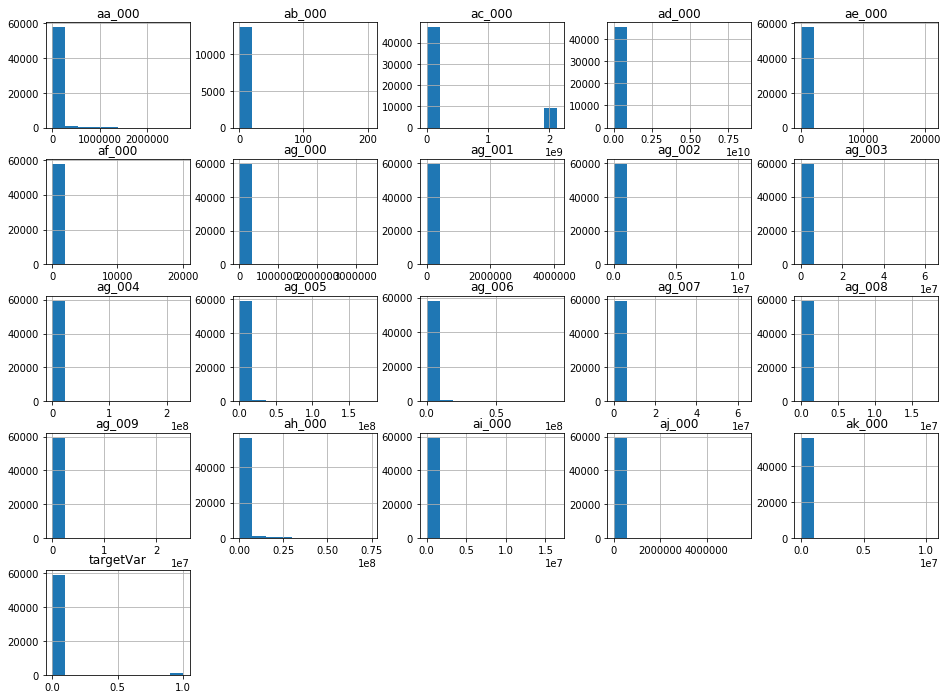

In [20]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

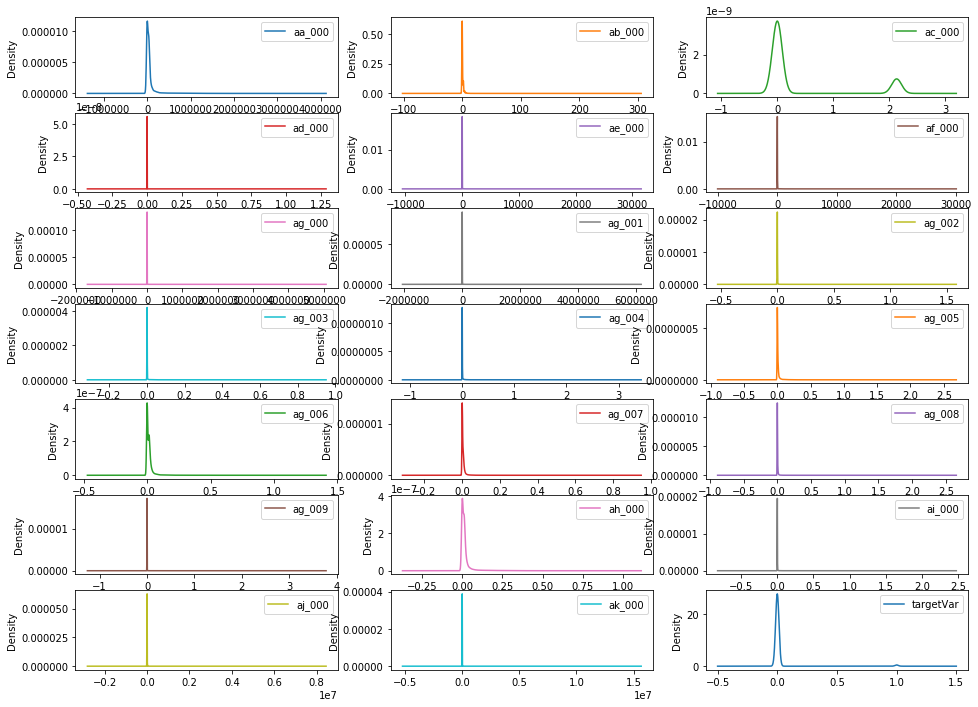

In [21]:
## Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

In [22]:
## Correlation matrix
# Calculate correlations
corr = entireDataset.corr()

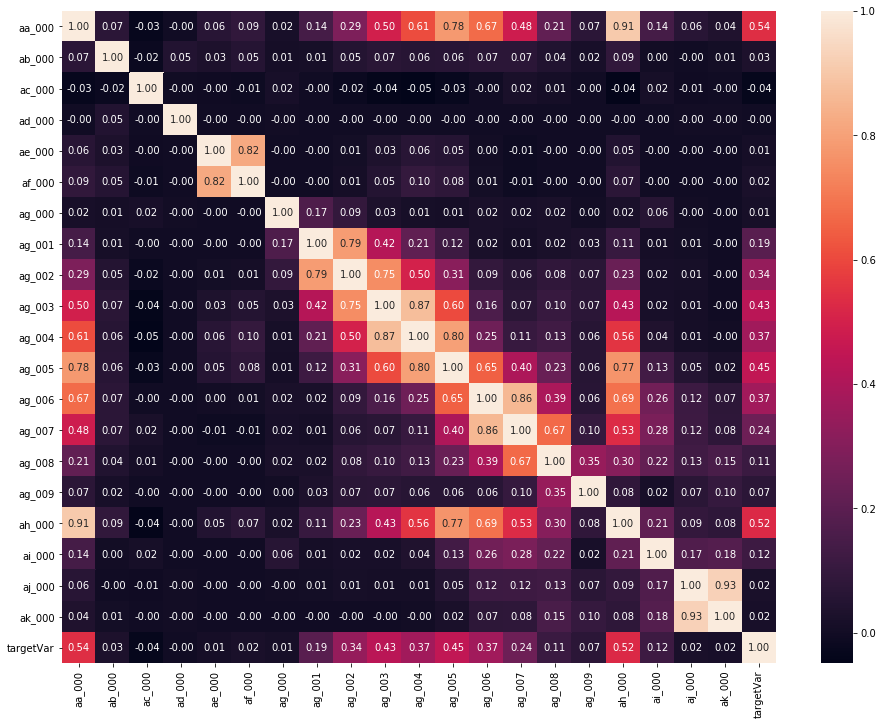

In [23]:
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

In [24]:
# 3. Prepare Data
# a) Data Cleaning
# Impute missing cells with value -1
entireDataset.fillna(-1, inplace=True)
print(entireDataset.head(20))

    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0    76698    -1.0  2.130706e+09   280.0     0.0     0.0     0.0     0.0   
1    33058    -1.0  0.000000e+00    -1.0     0.0     0.0     0.0     0.0   
2    41040    -1.0  2.280000e+02   100.0     0.0     0.0     0.0     0.0   
3       12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0   
4    60874    -1.0  1.368000e+03   458.0     0.0     0.0     0.0     0.0   
5    38312    -1.0  2.130706e+09   218.0     0.0     0.0     0.0     0.0   
6       14     0.0  6.000000e+00    -1.0     0.0     0.0     0.0     0.0   
7   102960    -1.0  2.130706e+09   116.0     0.0     0.0     0.0     0.0   
8    78696    -1.0  0.000000e+00    -1.0     0.0     0.0     0.0     0.0   
9   153204     0.0  1.820000e+02    -1.0     0.0     0.0     0.0     0.0   
10   39196    -1.0  2.040000e+02   170.0     0.0     0.0     0.0     0.0   
11   45912    -1.0  0.000000e+00   454.0     0.0     0.0     0.0     0.0   
12    2104  

In [25]:
testDataset.fillna(-1, inplace=True)
print(testDataset.head(20))

    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0       60     0.0  2.000000e+01    12.0     0.0     0.0     0.0     0.0   
1       82     0.0  6.800000e+01    40.0     0.0     0.0     0.0     0.0   
2    66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0     0.0   
3    59816    -1.0  1.010000e+03   936.0     0.0     0.0     0.0     0.0   
4     1814    -1.0  1.560000e+02   140.0     0.0     0.0     0.0     0.0   
5      174    -1.0  2.600000e+01    24.0     0.0     0.0    -1.0    -1.0   
6    40202    -1.0  6.400000e+02   606.0     0.0     0.0     0.0     0.0   
7   120278    -1.0  2.130706e+09   256.0     0.0     0.0     0.0     0.0   
8    14592     0.0  2.130706e+09   162.0     0.0     0.0     0.0     0.0   
9    28338    -1.0  2.130706e+09   238.0     0.0     0.0     0.0     0.0   
10   30758    -1.0  4.500000e+02   402.0     0.0     0.0     0.0     0.0   
11   40358    -1.0  1.672000e+03  1378.0     0.0     0.0     0.0     0.0   
12   33072  

In [27]:
# b) Feature Selection-NA

# c) Data Transforms-NA

In [26]:
# 3.d) Split-out training and validation datasets
# We create a training dataset (variable name "training") and a validation dataset (variable name "validation")

seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
totCol = len(testDataset.columns)
array = testDataset.values
X_validation = array[:,0:totCol-1]
Y_validation = array[:,totCol-1]
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print("Total time for data handling and visualization:", (datetime.now() - startTimeScript))

X_train.shape: (60000, 20) Y_train.shape: (60000,)
X_validation.shape: (16000, 20) Y_validation.shape: (16000,)
Total time for data handling and visualization: 0:07:22.808341


In [27]:
# 4.a) Set test options and evaluation metric
# b) Test options and evaluation metric
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [28]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [29]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('Model Training time:', (datetime.now() - startTimeModule))
print('Average metrics ('+scoring+') from all models:', np.mean(metrics))

LR: 0.925550 (0.005161)
Model Training time: 0:00:22.925669
CART: 0.988683 (0.001401)
Model Training time: 0:00:25.591175
NB: 0.972250 (0.002574)
Model Training time: 0:00:01.338591
KNN: 0.987550 (0.001491)
Model Training time: 0:00:51.462061
BT: 0.991367 (0.001376)
Model Training time: 0:02:07.944960
RF: 0.991533 (0.001278)
Model Training time: 0:00:41.426277
ET: 0.991467 (0.000894)
Model Training time: 0:00:27.510547
AB: 0.987767 (0.001332)
Model Training time: 0:01:46.861413
GBM: 0.990083 (0.001359)
Model Training time: 0:04:31.417024
Average metrics (accuracy) from all models: 0.9806944444444444


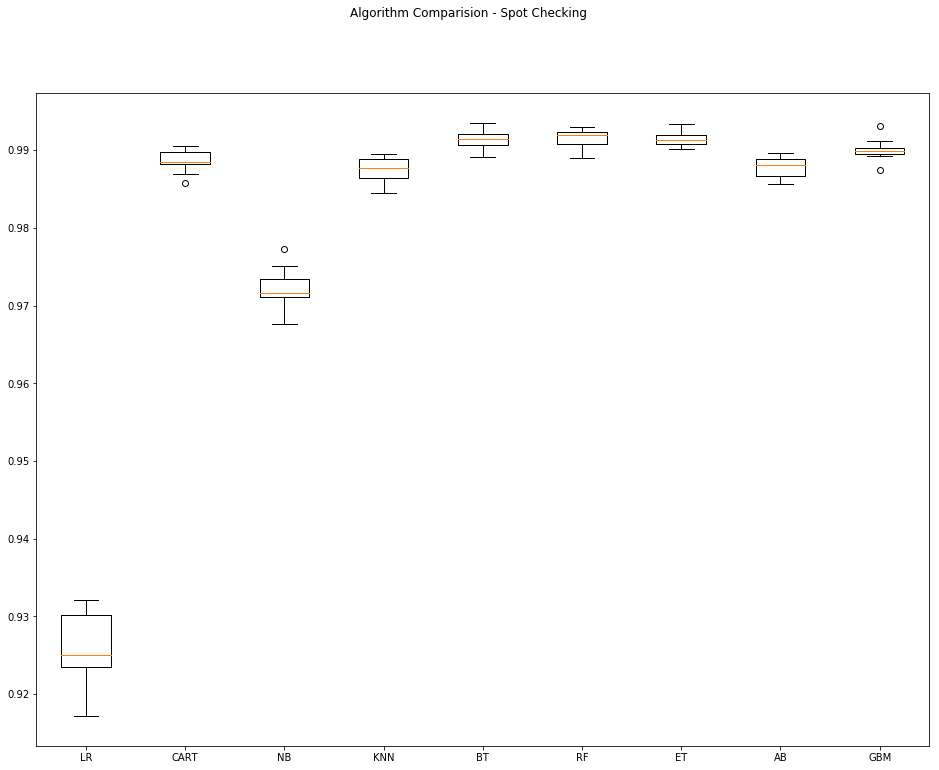

In [30]:
# c) Spot Check Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# 5. Improve Accuracy
# a) Algorithm Tuning
# Set up the comparison array
results = []
names = []

In [32]:
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('Model training time:', (datetime.now() - startTimeModule))

Best: 0.989517 using {'n_estimators': 500}
0.989517 (0.001124) with: {'n_estimators': 500}
0.989217 (0.001193) with: {'n_estimators': 600}
0.989350 (0.000967) with: {'n_estimators': 700}
0.989367 (0.001180) with: {'n_estimators': 800}
0.989450 (0.001236) with: {'n_estimators': 900}
Model training time: 4:57:01.983188


In [33]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([500,600,700,800,900]))
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid4.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('Model training time:', (datetime.now() - startTimeModule))

Best: 0.989517 using {'n_estimators': 500}
0.989517 (0.001124) with: {'n_estimators': 500}
0.989217 (0.001193) with: {'n_estimators': 600}
0.989350 (0.000967) with: {'n_estimators': 700}
0.989367 (0.001180) with: {'n_estimators': 800}
0.989450 (0.001236) with: {'n_estimators': 900}
Model training time: 5:35:00.582527


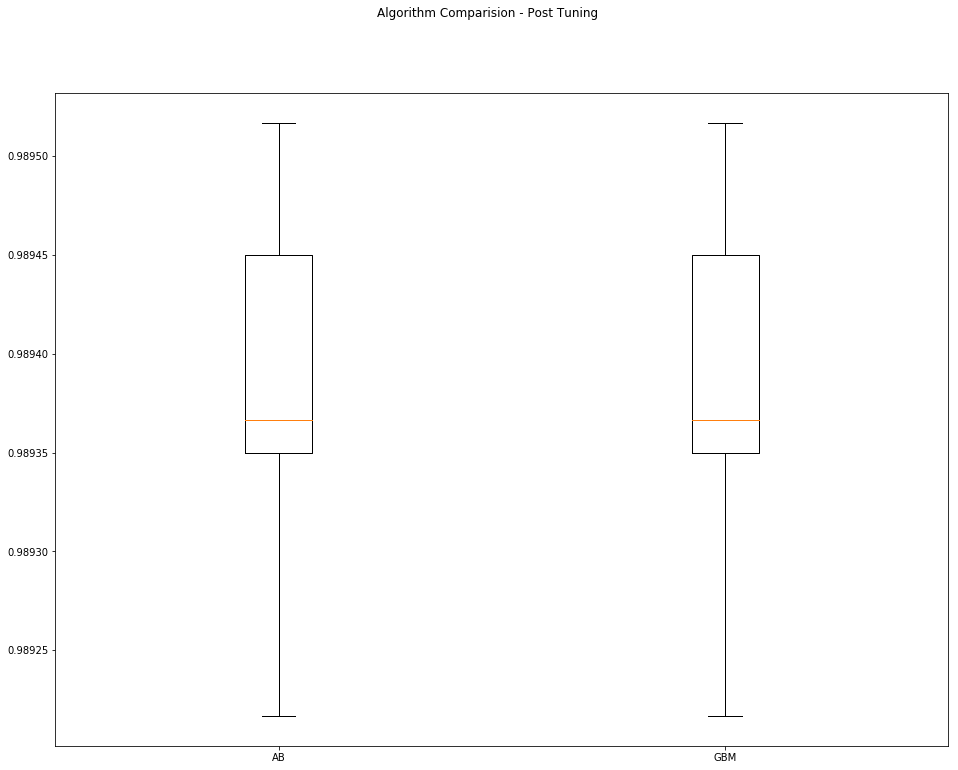

In [34]:
# 5.b) Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [35]:
# 6. Finalize Model
# 6.a) Predictions on validation dataset
model = GradientBoostingClassifier(n_estimators=800, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9894375
[[15577    48]
 [  121   254]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15625
         1.0       0.84      0.68      0.75       375

   micro avg       0.99      0.99      0.99     16000
   macro avg       0.92      0.84      0.87     16000
weighted avg       0.99      0.99      0.99     16000



In [36]:
# 6.b) Create standalone model on entire training dataset
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=800, random_state=seedNum)
finalModel.fit(X_train, Y_train)
print('Model training time:', (datetime.now() - startTimeModule))

Model training time: 0:03:04.739059


In [44]:
# c) Save model for later use
from sklearn.externals import joblib

In [45]:
modelName = 'finalModel_BinaryClass.sav'
joblib.dump(finalModel, modelName)

['finalModel_BinaryClass.sav']

In [40]:
# c) Save model for later use
modelName = 'finalModel_BinaryClass.sav'
dump(finalModel, modelName)
print('Total time for the script:', (datetime.now() - startTimeScript))

Total time for the script: 11:14:57.344753


In [47]:
# load the model from disk
loaded_model = joblib.load(modelName)
result = loaded_model.score(X_validation, Y_validation)
print(result)

0.9894375


In [48]:
# Define new instace
# define one new instance
Xnew = [[1.79415228, 2.10495117, 5,245,854,2132,34636,0,235,345,353,268464,352,
         90435,363246,326326,84754,0,0,0]]

In [49]:
# make a prediction
ynew = finalModel.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0])) 

X=[1.79415228, 2.10495117, 5, 245, 854, 2132, 34636, 0, 235, 345, 353, 268464, 352, 90435, 363246, 326326, 84754, 0, 0, 0], Predicted=0.0
